<a href="https://colab.research.google.com/github/Mary7Magdalene/MLL/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [6]:
house_price_dataset = pd.read_csv('/content/BOSTON HOUSING.csv')

In [7]:
house_price_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [15]:
#add the target(price)column to the dataset
house_price_dataset['price'] = house_price_dataset.iloc[:,-1]

In [16]:
house_price_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2,36.2


In [17]:
house_price_dataset.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,price
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9,11.9


In [18]:
#checking the number of rows and columns present in the dataset
house_price_dataset.shape

(506, 15)

In [10]:
#checking for missing values
house_price_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [19]:
#checking for the missing values
house_price_dataset.isnull().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


In [12]:
#checking for the statistical measures of the dataset
house_price_dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Understanding the correaltion between features



1.   positive correaltion
2.   negative correlation



In [20]:
correlation = house_price_dataset.corr()

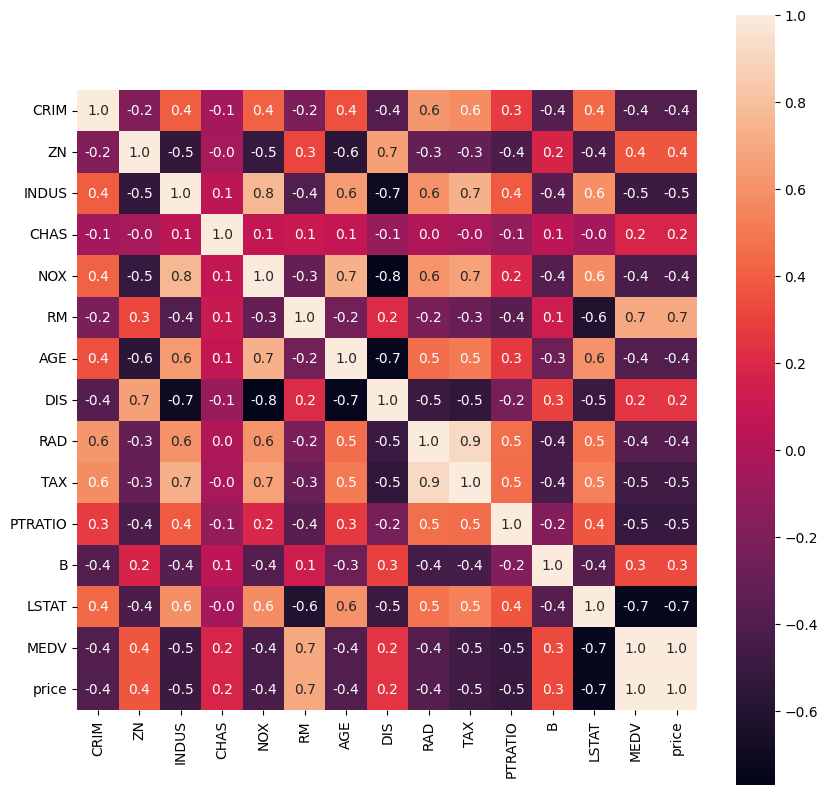

In [24]:
#constructing a heatmap to understand the cirrelation
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, cmap ='rocket')
plt.show()

Splitting the data and target

In [25]:
x = house_price_dataset.drop(columns = 'price', axis =1)
y = house_price_dataset['price']

In [26]:
print(x)
print(y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

In [28]:
#splitting tha data int training data and test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 2)

In [30]:
print(x.shape,x_train.shape, x_test.shape)

(506, 14) (404, 14) (102, 14)


Model training

XGBoostRegressor

In [37]:
#loading the model
model = XGBRegressor()

In [38]:
#training the model with
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluating the model

In [53]:
#prediction on the training data
#accuracy for the prediction on the training data
training_data_prediction = model.predict(x_train)

In [54]:
print(training_data_prediction)

[23.099184  21.001928  20.100151  34.700844  13.900489  13.4994335
 22.000292  15.200204  10.9001665 22.699703  13.802217   5.599481
 29.799265  49.99975   34.90006   20.599842  23.399393  19.203949
 32.69902   19.599915  27.001448   8.400154  46.000587  21.699905
 27.100334  19.399717  19.29997   24.79995   22.599451  31.698044
 18.49928    8.700446  17.400322  23.699738  13.299408  10.500857
 12.701233  24.999445  19.699574  14.9040985 24.203266  25.000257
 14.900104  17.000736  15.6022    12.700935  24.50071   15.002033
 50.00038   17.499445  21.20107   32.001377  15.5998955 22.900192
 19.29776   18.701061  23.300817  37.20084   30.10039   33.099957
 20.999388  49.99997   13.399203   5.0005326 16.500277   8.399902
 28.698734  19.499475  20.600014  45.400154  39.801903  33.399246
 19.799984  33.400394  25.300386  49.99995   12.497478  17.399996
 18.599419  22.599518  49.999756  23.801239  23.299906  23.100735
 41.698494  16.100563  31.600891  36.09942    7.0000014 20.400219
 20.00016

In [55]:
#R squared error
score_1 = metrics.r2_score(y_train, training_data_prediction)

#mean squares error
score_2 = metrics.mean_absolute_error(y_train,training_data_prediction)

print('R squared error is :',score_1)
print('Mean absolute error:', score_2)

R squared error is : 0.9999999850296076
Mean absolute error: 0.0007860500033540532


Visualizing the actual prices and predicted prices

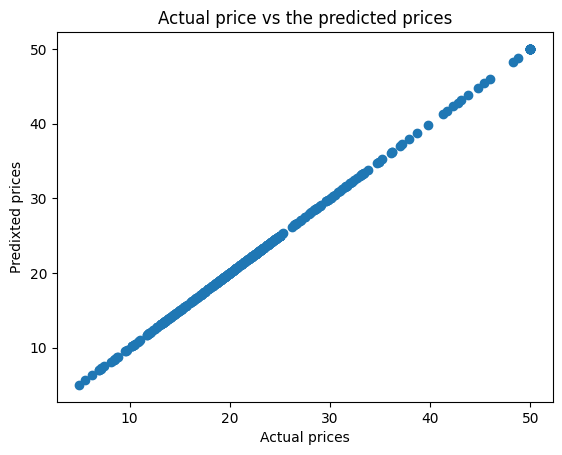

In [56]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel('Actual prices')
plt.ylabel('Predixted prices')
plt.title ('Actual price vs the predicted prices')
plt.show()

Prediction on the test data

In [49]:
#prediction on the test data
#accuracy for the prediction on the test data
test_data_prediction = model.predict(x_test)

In [50]:
print(test_data_prediction)

[20.151344  15.17063   37.17863   32.587086   8.802745  14.163023
 22.013512  26.602274  15.028527  21.475891  29.188023  24.792862
 22.017763  16.164452  13.877953  21.6283    21.724865  12.79105
  7.420695  11.957173  20.753304  19.273947  36.00695   17.441862
 16.705866  20.128897  50.006893  34.111977  35.002323  19.454771
 20.785254  21.119623  30.89196   23.425383   8.0634165 15.677011
 10.872315  21.693468  23.202291  20.769682  22.011518  13.452923
 28.489483  10.756876  23.034924  13.802567  35.87465   18.402987
 30.280247  17.902842  29.787659  30.561575   5.064979  35.13793
 27.457115  18.255224  18.575626  17.457733  15.807973  22.352776
 20.21995   20.557352  19.798906  28.35353   35.019604  27.527376
 48.53315   27.47124   10.835308  21.980637  13.115688   7.2288547
 20.593801  20.105713  24.95989   22.041893  18.978966  24.28226
 19.376139  23.916008  35.214783  19.410816  21.39286   26.506063
 36.089516  35.131058  21.375639  23.63435   24.793291  19.861847
 20.780867  

In [51]:
#R squared error
score_1 = metrics.r2_score(y_test, test_data_prediction)

#mean squares error
score_2 = metrics.mean_absolute_error(y_test,test_data_prediction)

print('R squared error is :',score_1)
print('Mean absolute error:', score_2)

R squared error is : 0.9988554289744416
Mean absolute error: 0.1560735543568929


Visualising the actual prices and the predicted prices on the test data

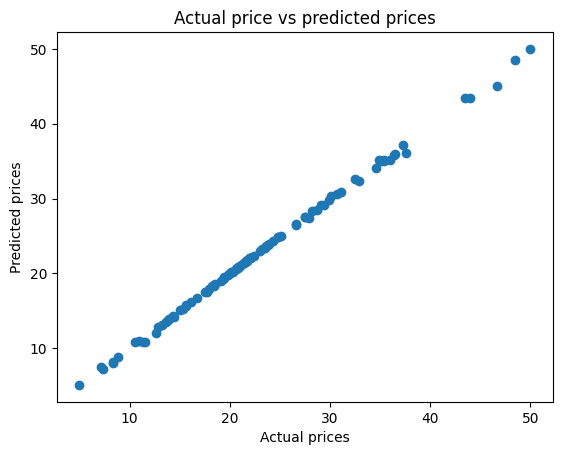

In [57]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual price vs predicted prices')
plt.show()